In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/Albert/Desktop/Thinkful_Drills/CSVs/Supervised Learning/HR_data_set.csv')
df.rename(columns={'sales':'role'}, inplace=True)

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,role,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
sns.set_style('darkgrid')
#sns.set_palette(sns.color_palette('Blues_d'))

## Univariate Data Exploration

There are 0 missing data points



<function matplotlib.pyplot.show>

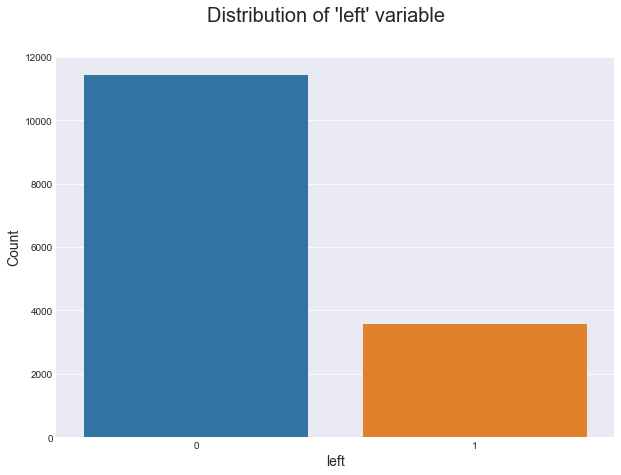

In [4]:
## Exploring outcome variable

## How many null values are there
print('There are {} missing data points\n'.format(len(df[df.left==None])))

## Histogram with counts
f, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='left', data=df)
plt.suptitle('Distribution of \'left\' variable', fontsize=20)
plt.xlabel('left', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show

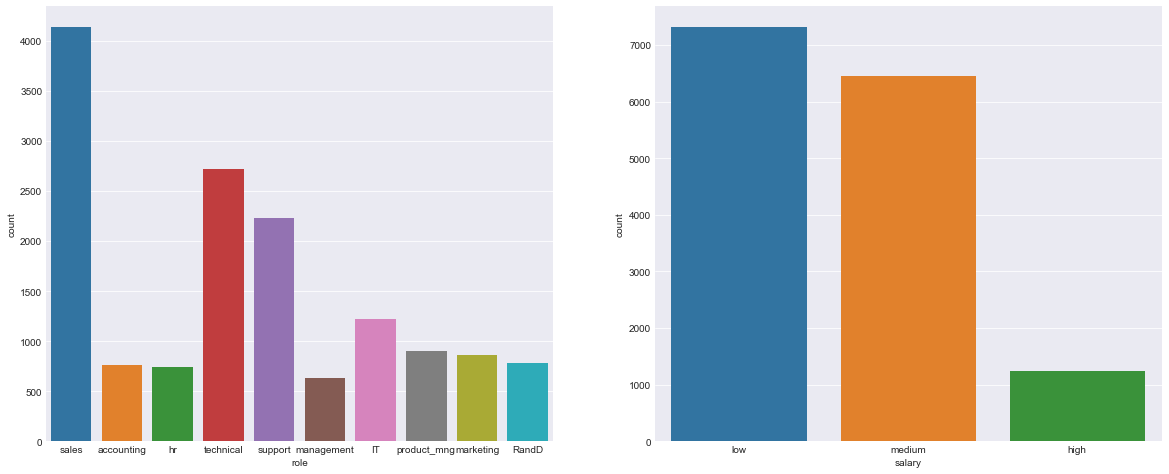

In [5]:
## Exploring categorical variables

## Bar plots

f, ax = plt.subplots(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(x='role', data=df)

plt.subplot(1,2,2)
sns.countplot(x='salary', data=df)

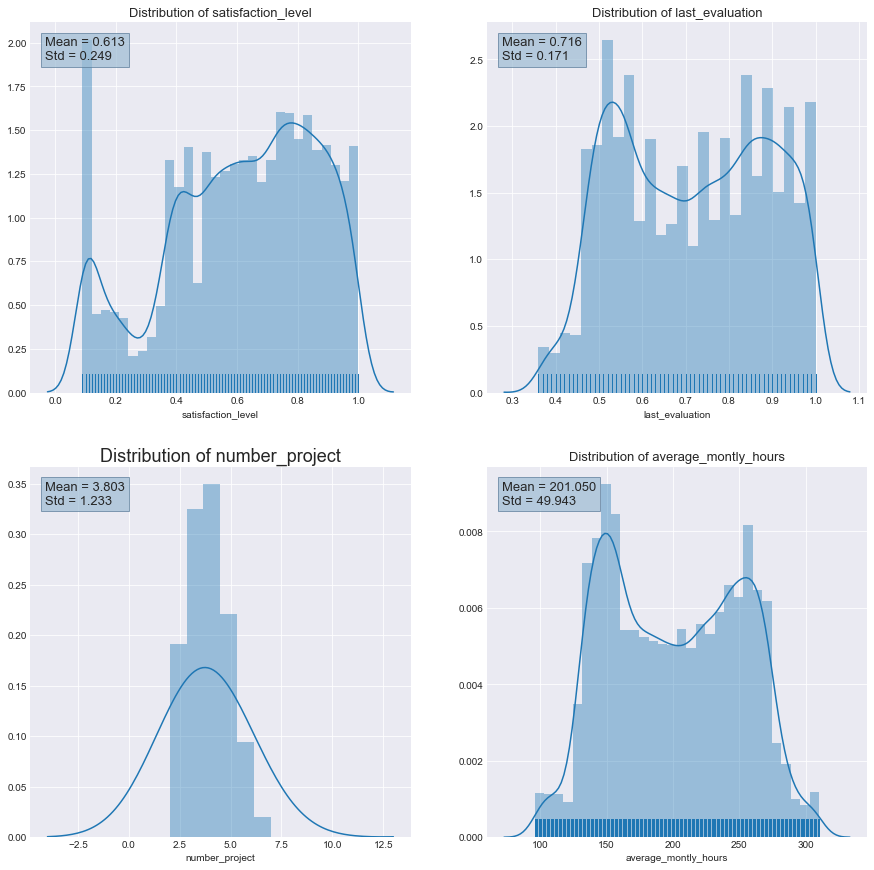

In [6]:
## Exploring continuous variables

## Plotting histograms
f, ax = plt.subplots(figsize=(15,15))

data = [df.satisfaction_level, df.last_evaluation, df.number_project, df.average_montly_hours]
count=0
for data_name in data:
    global count
    ax = plt.subplot(2,2, count+1)
    mean = df.mean()[count]
    std = df.std()[count]
    var_name = df.columns[count]
    if data_name is df.number_project:
        sns.distplot(data_name, bins=6, kde_kws={'bw':2}) #Adjusting bin count & bandwith for discrete variables
        plt.title('Distribution of {}'.format(var_name), fontdict={'fontsize':18})
        plt.text(0.04, .96, 'Mean = {:.3f}\nStd = {:.3f}'.format(mean, std), transform=ax.transAxes, fontsize=13, verticalalignment='top', bbox=dict(alpha=0.7, facecolor='#9dbcd4', edgecolor='#5b7c99', capstyle='butt'))
        count+=1
    else:
        sns.distplot(data_name, rug=True)
        plt.title('Distribution of {}'.format(df.columns[count]), fontdict={'fontsize':13})
        plt.text(0.04, .96, 'Mean = {:.3f}\nStd = {:.3f}'.format(mean, std), transform=ax.transAxes, fontsize=13, verticalalignment='top', bbox=dict(alpha=0.7, facecolor='#9dbcd4', edgecolor='#5b7c99', capstyle='butt'))
        count+=1    

#### Notes:

1) Appears that number of projects follows along a normal distribution

2) No other continuous variables appear to have a normal distribution however

# For Review

# How to fit distribution onto sample

/Users/Albert/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Text(0.5,1,'Raw')

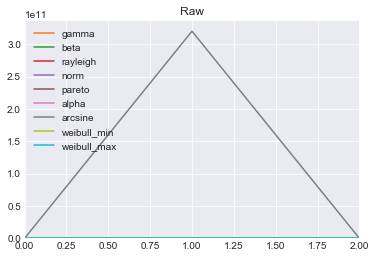

In [7]:
## Test for known distribution types by playing with data

# Start with satisfaction level


dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto','alpha','arcsine','weibull_min', 'weibull_max']
sample = df['satisfaction_level'].dropna()
sample_size = scipy.arange(len(sample))


plt.hist(sample, bins=range(50))
for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(sample)
    pdf_fitted = dist.pdf(sample_size, *param[:-2], loc=param[-2], scale=param[-1]) * len(sample_size)
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0,2)
plt.legend(loc='upper left')
plt.title('Raw')


# End of section for review

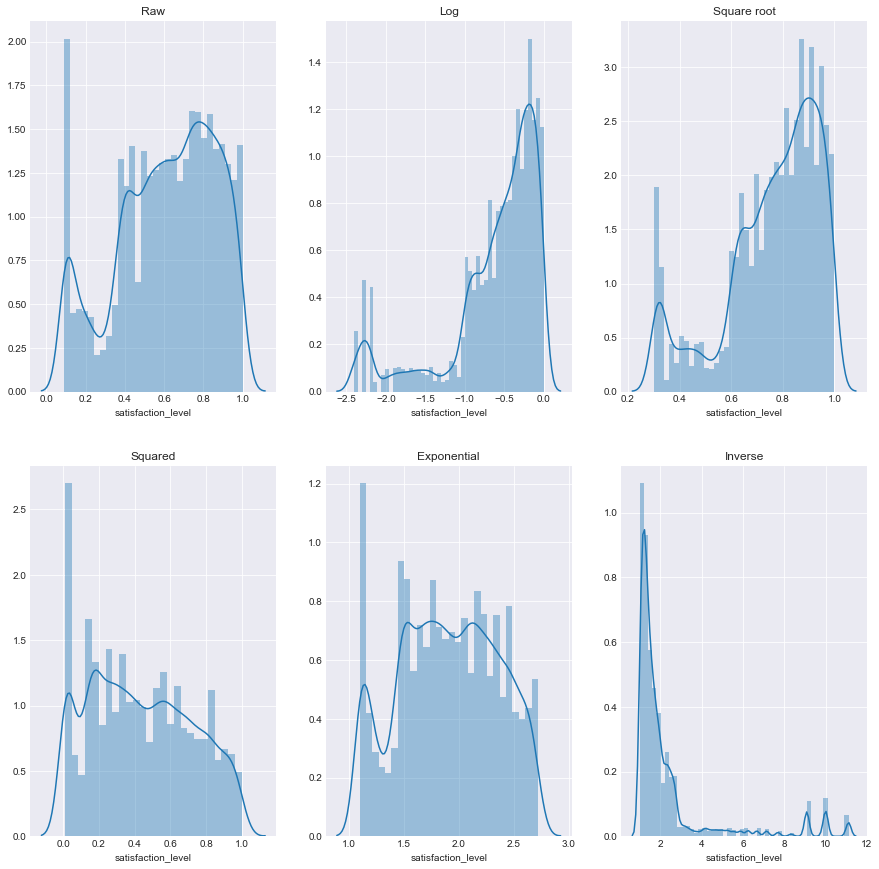

In [8]:
# Let's see if we can create any normal distributions by transforming the data

f, ax = plt.subplots(figsize=(15,15))

plt.subplot(2,3,1)
sns.distplot(df['satisfaction_level'].dropna())
plt.title('Raw')

plt.subplot(2,3,2)
sns.distplot(np.log(df['satisfaction_level'].dropna()))
plt.title('Log')

plt.subplot(2,3,3)
sns.distplot(np.sqrt(df['satisfaction_level'].dropna()))
plt.title('Square root')

plt.subplot(2,3,4)
sns.distplot(np.square(df['satisfaction_level'].dropna()))
plt.title('Squared')

plt.subplot(2,3,5)
sns.distplot(np.exp(df['satisfaction_level'].dropna()))
plt.title('Exponential')

plt.subplot(2,3,6)
sns.distplot(1/df['satisfaction_level'].dropna())
plt.title('Inverse')

plt.show()

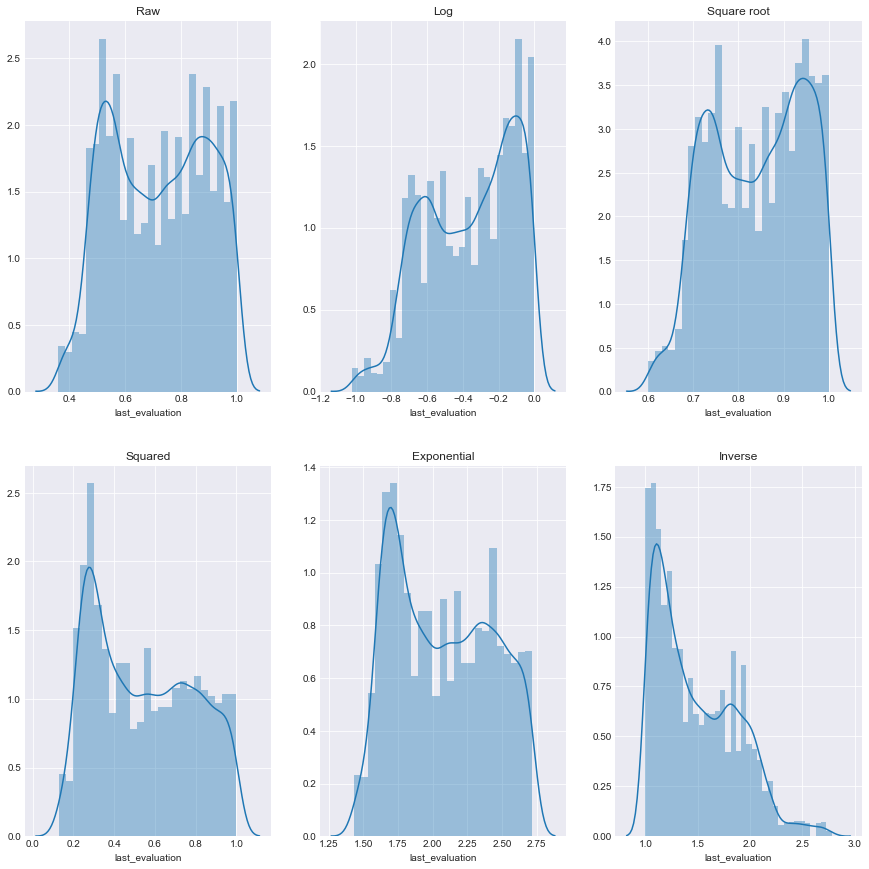

In [9]:
# Let's see if we can create any normal distributions by transforming the data

f, ax = plt.subplots(figsize=(15,15))

plt.subplot(2,3,1)
sns.distplot(df['last_evaluation'].dropna())
plt.title('Raw')

plt.subplot(2,3,2)
sns.distplot(np.log(df['last_evaluation'].dropna()))
plt.title('Log')

plt.subplot(2,3,3)
sns.distplot(np.sqrt(df['last_evaluation'].dropna()))
plt.title('Square root')

plt.subplot(2,3,4)
sns.distplot(np.square(df['last_evaluation'].dropna()))
plt.title('Squared')

plt.subplot(2,3,5)
sns.distplot(np.exp(df['last_evaluation'].dropna()))
plt.title('Exponential')

plt.subplot(2,3,6)
sns.distplot(1/df['last_evaluation'].dropna())
plt.title('Inverse')

plt.show()

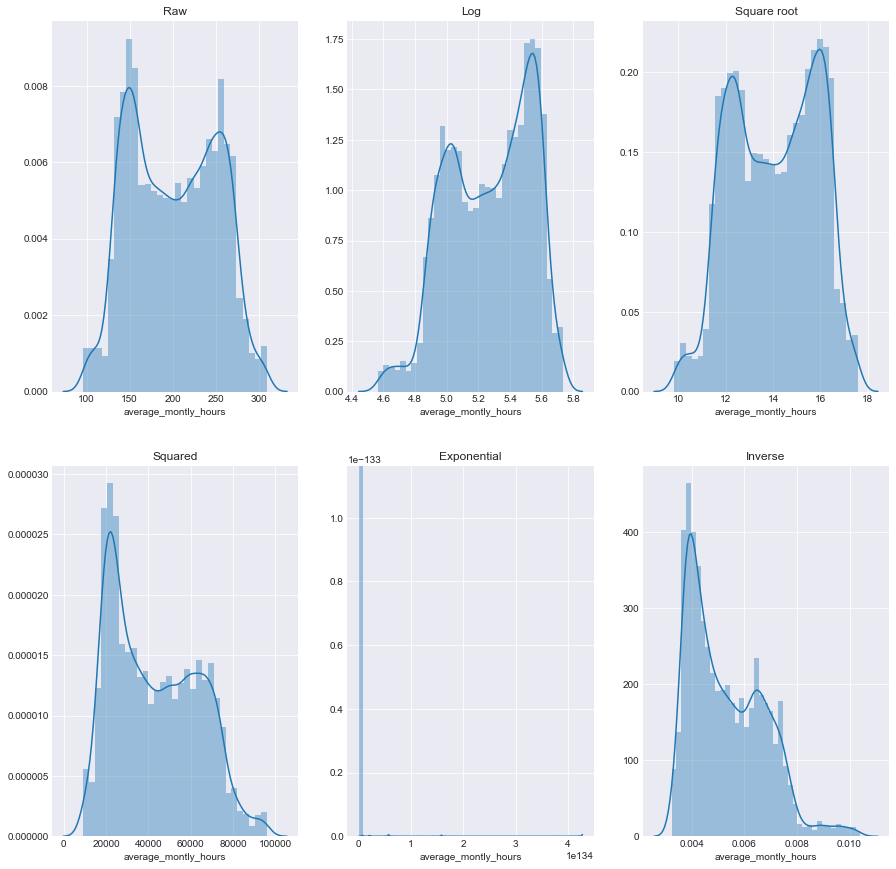

In [10]:
# Let's see if we can create any normal distributions by transforming the data

f, ax = plt.subplots(figsize=(15,15))

plt.subplot(2,3,1)
sns.distplot(df['average_montly_hours'].dropna())
plt.title('Raw')

plt.subplot(2,3,2)
sns.distplot(np.log(df['average_montly_hours'].dropna()))
plt.title('Log')

plt.subplot(2,3,3)
sns.distplot(np.sqrt(df['average_montly_hours'].dropna()))
plt.title('Square root')

plt.subplot(2,3,4)
sns.distplot(np.square(df['average_montly_hours'].dropna()))
plt.title('Squared')

plt.subplot(2,3,5)
sns.distplot(np.exp(df['average_montly_hours'].dropna()))
plt.title('Exponential')

plt.subplot(2,3,6)
sns.distplot(1/df['average_montly_hours'].dropna())
plt.title('Inverse')

plt.show()

#### Notes

1) Variable number of projects has a normal distribution

2) None of the other variables have any recognizable distribution patterns. However, when you transform them, there are some instances of recognizable distribution patterns

## Bivariate Data Exploration - Continuous Variables

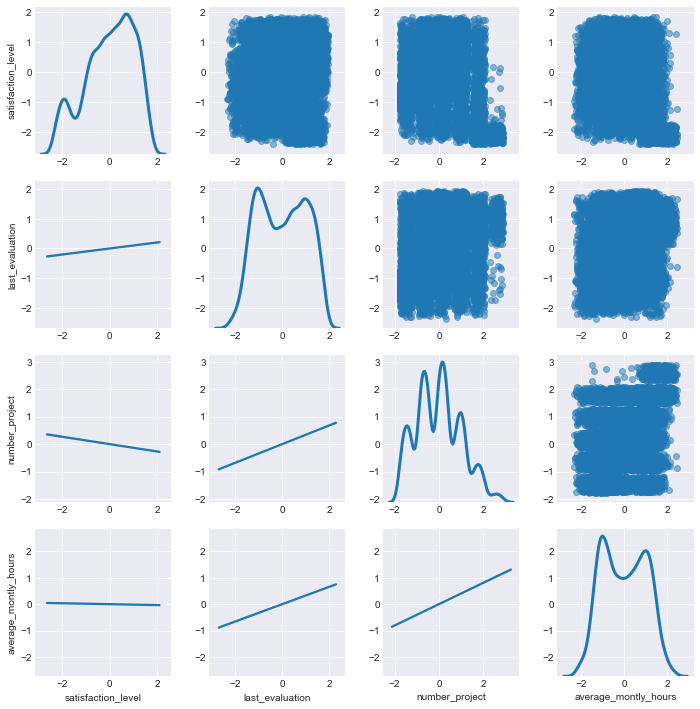

In [11]:
## Next we'll explore relationships between continuous variables.

# Create a matrix with data from continuous variables.
df_continuous = df.iloc[:,:4]

# Stanardize the data.
from sklearn.preprocessing import StandardScaler
df_continuous_standard = StandardScaler().fit_transform(df_continuous)

# Transpose from array to DataFrame.
df_continuous_standard = pd.DataFrame(df_continuous_standard, columns=df_continuous.columns, index=df_continuous.index)

# Add jitter.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_continuous_standard.shape)),
    columns=df_continuous.columns,
    index=df_continuous.index
)

df_continuous_standard_jitter = df_continuous_standard.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_continuous_standard_jitter.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

                      satisfaction_level  last_evaluation  number_project  \
satisfaction_level              1.000000         0.105021       -0.142970   
last_evaluation                 0.105021         1.000000        0.349333   
number_project                 -0.142970         0.349333        1.000000   
average_montly_hours           -0.020048         0.339742        0.417211   

                      average_montly_hours  
satisfaction_level               -0.020048  
last_evaluation                   0.339742  
number_project                    0.417211  
average_montly_hours              1.000000  


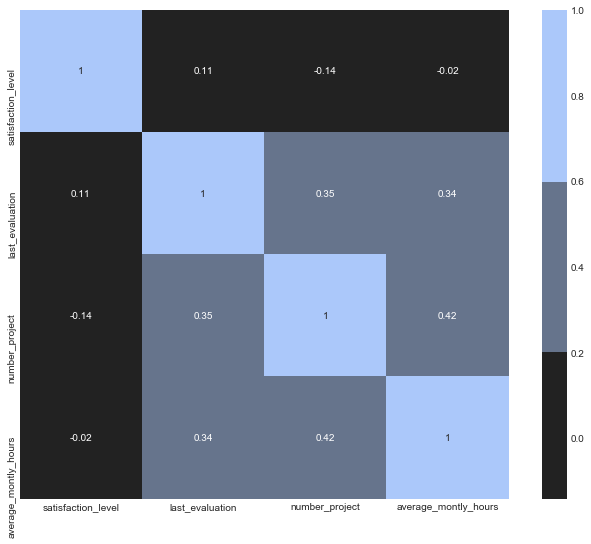

In [12]:
## Let's check to see if there are any relationships

# Make the correlation matrix.
corrmat = df_continuous.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
color = sns.diverging_palette(250, 250, s=90, l=80, sep=5, n=5, center='dark')
sns.heatmap(corrmat, center=0, annot=True, cmap=color, square=True)
plt.show()

#### Notes:

1) There is a medium-strength correlation between the number of projects someone worked on, and how many hours they work per month - this is logical as someone who works more hours is most likely working on more projects

2) There is also a slightly weaker correlation between how well they scored on their last evaluation, and how much they work and how many projects they complete. This is also a logical correlation

3) There is absolutely NO relationship between job satisfaction level and ANY of the other variables

In [13]:
## Exploring relationships via data transformation

# Create function to easily transform continuous variables

def transformation_matrix (series):
    df = pd.DataFrame(series)
    df['log'] = np.log(series)
    df['sqrt'] = np.sqrt(series)
    df['square'] = np.square(series)
    df['exponent'] = np.exp(series)
    df['inverse'] = 1/series
    
    return df

In [14]:
# Create a function for plotting variable against every iteration in the transformation matrix 

def plotting_transformations (df, y):
    f, ax = plt.subplots(figsize=(15,15))

    plt.subplot(2,3,1)
    sns.regplot(df.iloc[:,0], y, scatter=True, fit_reg=True)
    plt.title('Raw - r:{:.3f}'.format((np.corrcoef(df.iloc[:,0], y))[0][1]))

    plt.subplot(2,3,2)
    sns.regplot(df.iloc[:,1], y, scatter=True, fit_reg=True)
    plt.title('Log - r:{:.3f}'.format((np.corrcoef(df.iloc[:,1], y))[0][1]))

    plt.subplot(2,3,3)
    sns.regplot(df.iloc[:,2], y, scatter=True, fit_reg=True)
    plt.title('Square root - r:{:.3f}'.format((np.corrcoef(df.iloc[:,2], y))[0][1]))

    plt.subplot(2,3,4)
    sns.regplot(df.iloc[:,3], y, scatter=True, fit_reg=True)
    plt.title('Squared - r:{:.3f}'.format((np.corrcoef(df.iloc[:,3], y))[0][1]))

    plt.subplot(2,3,5)
    sns.regplot(df.iloc[:,4], y, scatter=True, fit_reg=True)
    plt.title('Exponential - r:{:.3f}'.format((np.corrcoef(df.iloc[:,4], y))[0][1]))

    plt.subplot(2,3,6)
    sns.regplot(df.iloc[:,5], y, scatter=True, fit_reg=True)
    plt.title('Inverse - r:{:.3f}'.format((np.corrcoef(df.iloc[:,5], y))[0][1]))

    plt.show()

In [15]:
df_satisfaction_level = transformation_matrix(df.satisfaction_level)
df_last_evaluation = transformation_matrix(df.last_evaluation)
df_number_project = transformation_matrix(df.number_project)
df_average_monthly_hours = transformation_matrix(df.average_montly_hours)

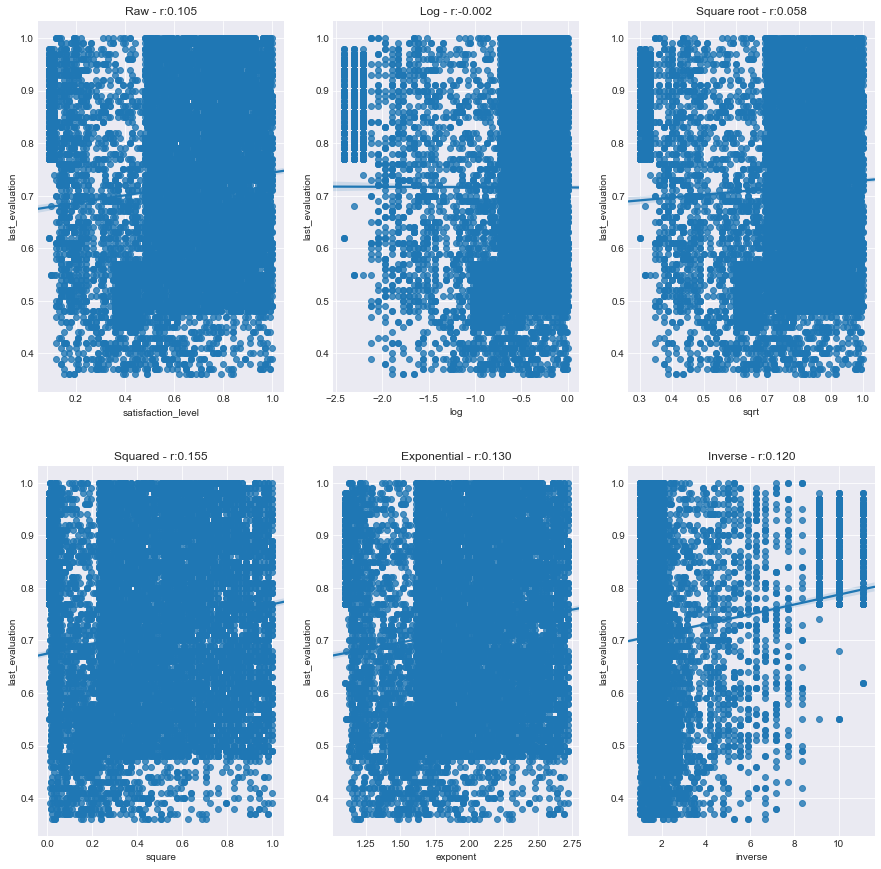

In [16]:
plotting_transformations(df_satisfaction_level, df.last_evaluation)

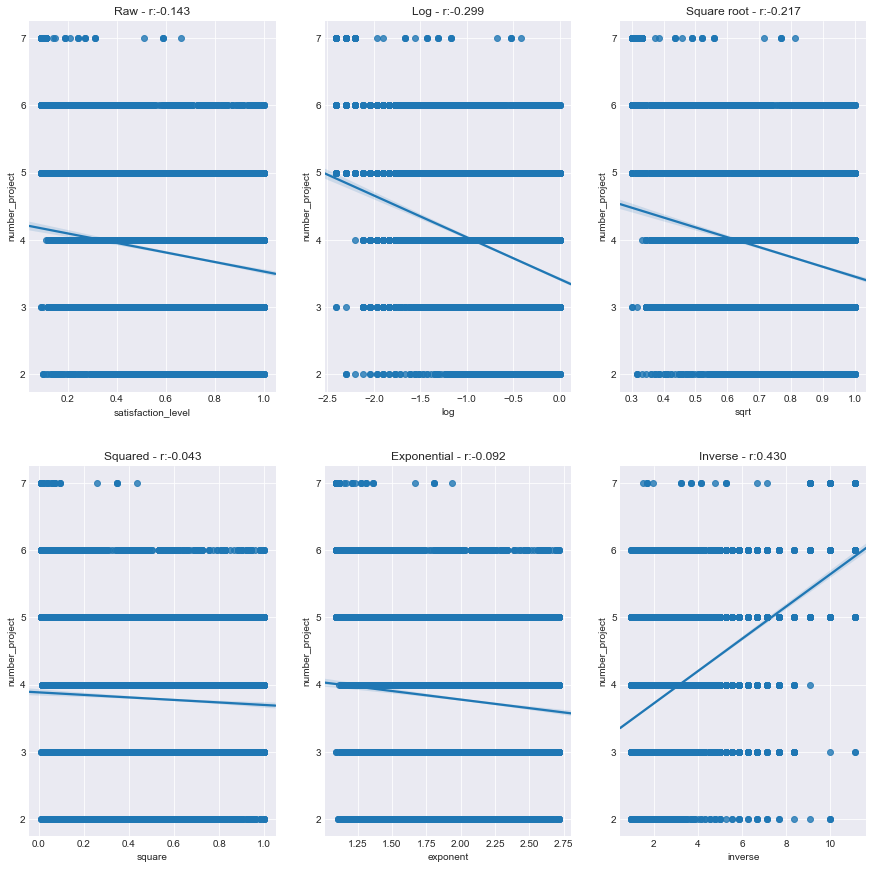

In [17]:
plotting_transformations(df_satisfaction_level, df.number_project)

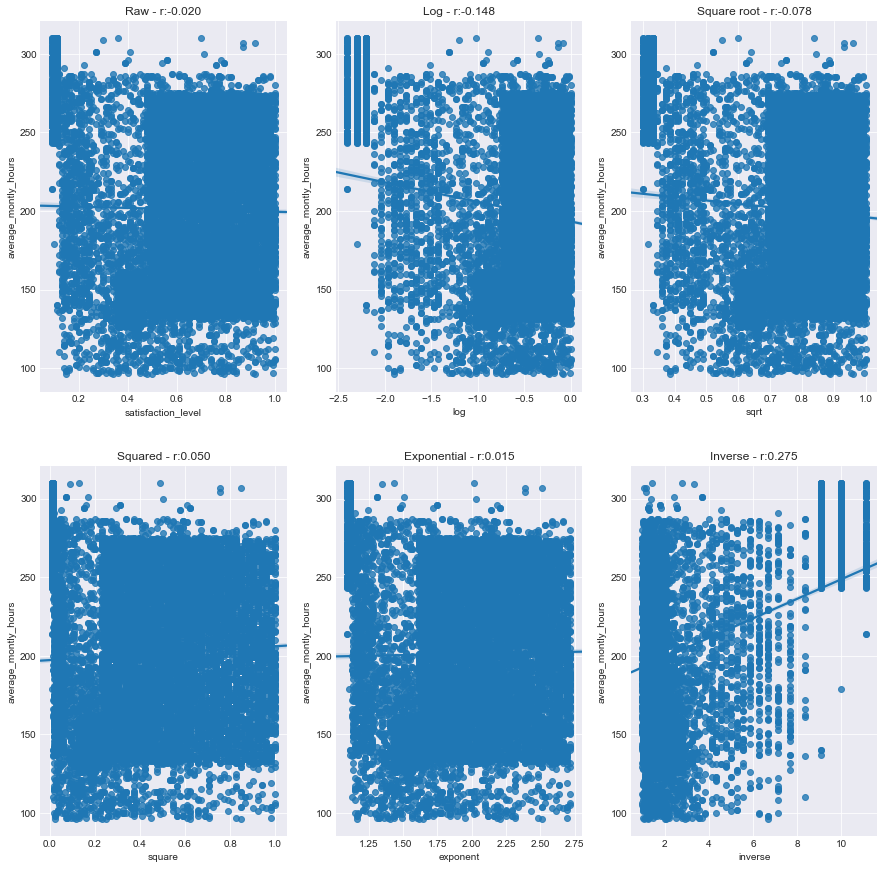

In [18]:
plotting_transformations(df_satisfaction_level, df.average_montly_hours)

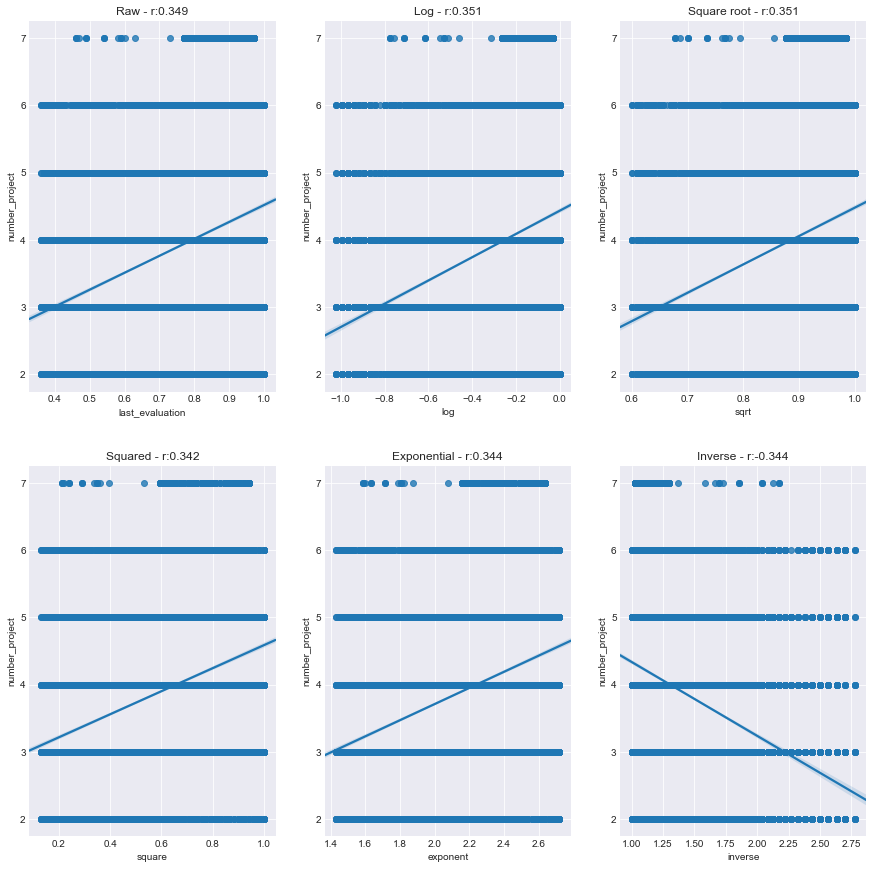

In [19]:
plotting_transformations(df_last_evaluation, df.number_project)

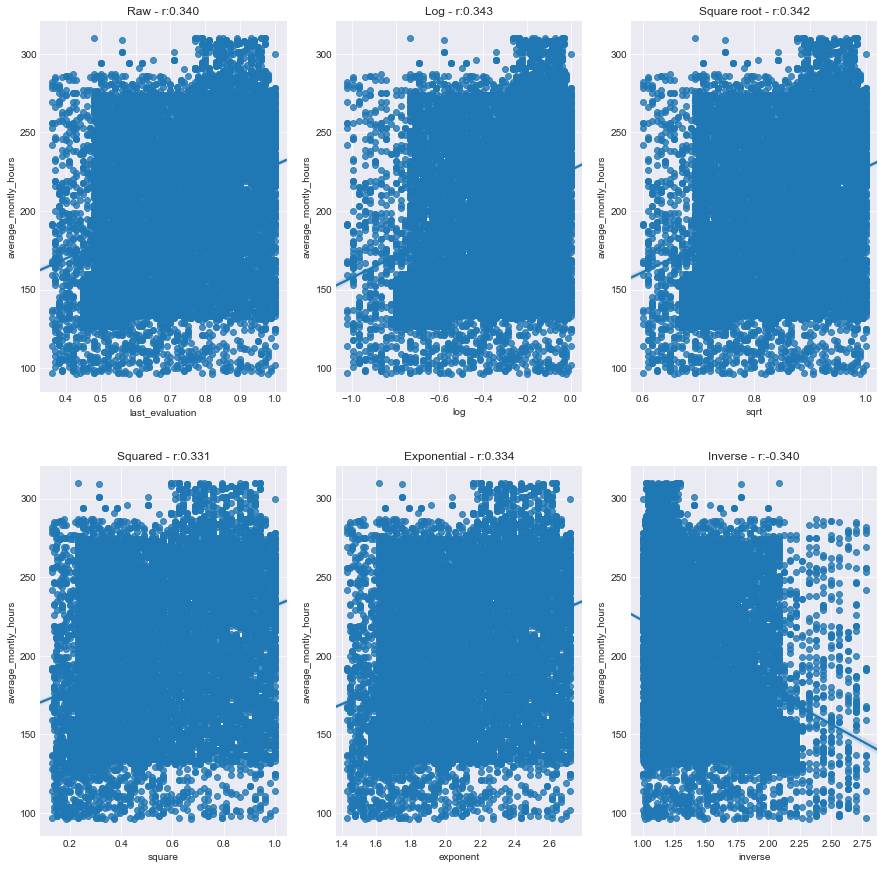

In [20]:
plotting_transformations(df_last_evaluation, df.average_montly_hours)

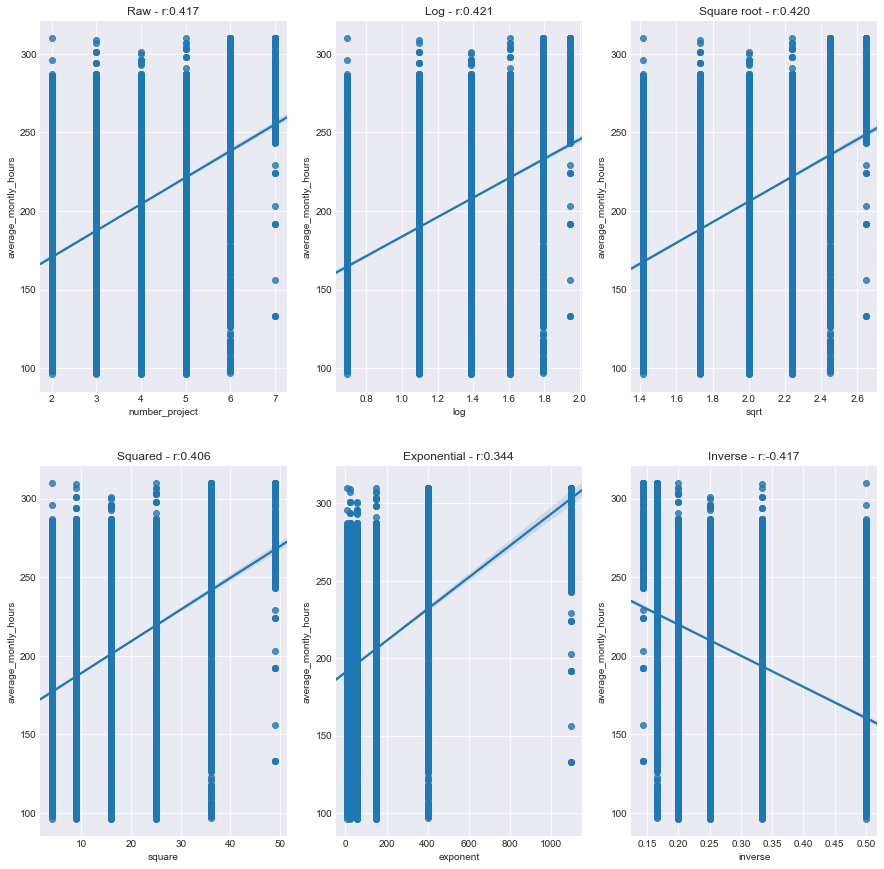

In [21]:
plotting_transformations(df_number_project, df.average_montly_hours)

#### Notes:
1) Relationship of interest is that the inverse of satisfaction levels has a medium strength correlation to the number of projects

## Bivariate Data Exploration - Continuous vs. Categorical Variables

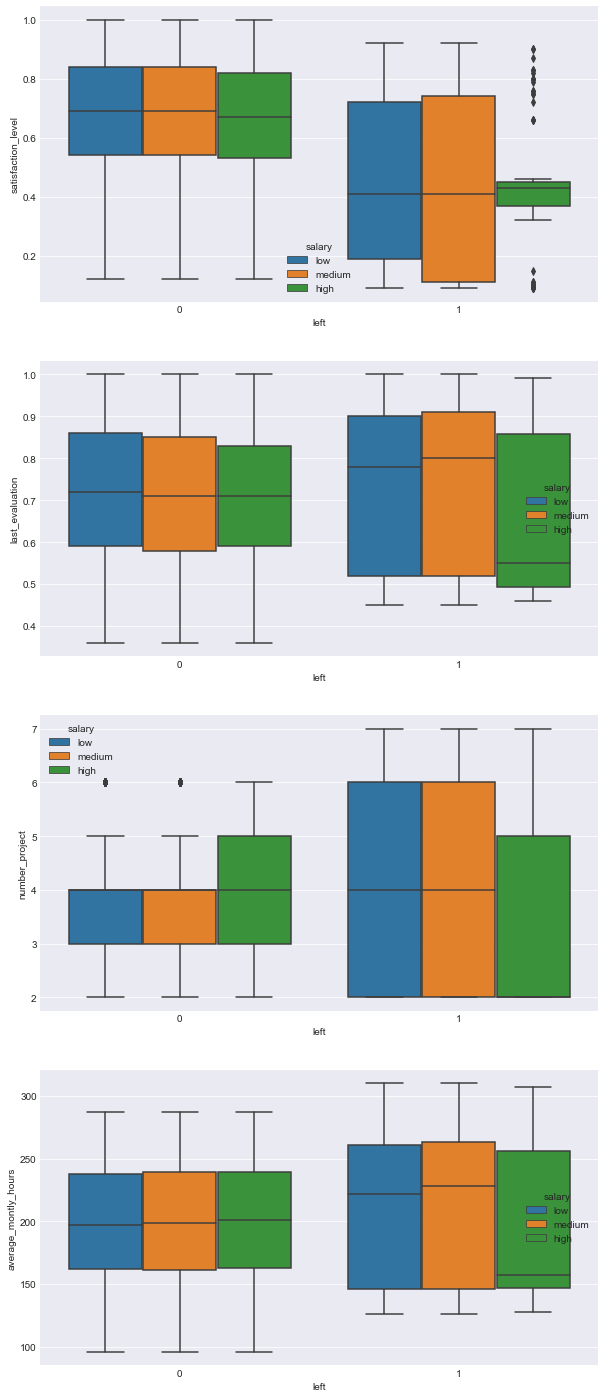

In [22]:
## Create plots to visually inspect impact of categorical variables on continuous variable means.

# Boxplots for continuous variables, pivoted by salary.

f, ax = plt.subplots(figsize=(10,25))

plt.subplot(4,1,1)
sns.boxplot(x='left', y='satisfaction_level', hue='salary', data=df)

plt.subplot(4,1,2)
sns.boxplot(x='left', y='last_evaluation', hue='salary', data=df)

plt.subplot(4,1,3)
sns.boxplot(x='left', y='number_project', hue='salary', data=df)

plt.subplot(4,1,4)
sns.boxplot(x='left', y='average_montly_hours', hue='salary', data=df)

#### Notes:

1) Individuals in different salary pools behave differently:
- Those in the medium-low range are more likely to leave for a higher salary, and are more ambitious (indiviuals in this class who left worked more hours and had higher evalutions)
- Those in the high range are more likely to leave because they are not engaged in their work. For these individuals, a low average of monthly hours worked and poor evaluations were predictors of the employee leaving

2) Satisfaction obviously plays a huge role here as well

In [23]:
## Because high salary individuals clearly behave drastically differently, we will split the continuous variables
## into 2 buckets - low-medium and high - and run a t-test to compare continuous variable means between those 
## employees that left and those that didn't


# Split dataframe into 2 groups

df_salary_high = df[df.salary == 'high']

df_salary_low_medium = df[(df.salary == 'low')|(df.salary == 'medium')]

In [24]:
# Run t-tests for high salary group

for col in df_salary_high.iloc[:,:4].columns:
    print(col.capitalize())
    print(stats.ttest_ind(
        df_salary_high[df_salary_high['left']==0][col].dropna(),
        df_salary_high[df_salary_high['left']==1][col].dropna()
    ))
    print('\n')

Satisfaction_level
Ttest_indResult(statistic=8.6322840627864252, pvalue=1.8245969274670814e-17)


Last_evaluation
Ttest_indResult(statistic=3.5798286493858633, pvalue=0.00035715607868204939)


Number_project
Ttest_indResult(statistic=2.7268272953486239, pvalue=0.0064851741728114767)


Average_montly_hours
Ttest_indResult(statistic=1.330154619360064, pvalue=0.18371291389740421)




In [25]:
# Run t-tests for low_med salary group

for col in df_salary_low_medium.iloc[:,:4].columns:
    print(col.capitalize())
    print(stats.ttest_ind(
        df_salary_low_medium[df_salary_low_medium['left']==0][col].dropna(),
        df_salary_low_medium[df_salary_low_medium['left']==1][col].dropna()
    ))
    print('\n')

Satisfaction_level
Ttest_indResult(statistic=50.677432132894339, pvalue=0.0)


Last_evaluation
Ttest_indResult(statistic=-1.0692642661885861, pvalue=0.28496936418609842)


Number_project
Ttest_indResult(statistic=-3.2267005176039087, pvalue=0.0012551941795532525)


Average_montly_hours
Ttest_indResult(statistic=-9.0243963487618899, pvalue=2.0433050300437879e-19)




#### Notes:

**Satisfaction Level**:
- Has a huge impact for both groups - lower satisfaction increases likelihood of leaving

**Last Evaluation**:
- Has NO significance in the low-med group
- Has high significance (p-value <.0001) in high salary group - lower evaluation increases likelihood of leaving

**Number Projects**:
- Has a significant impact on both groups (p-value < .01), BUT in different ways
- For low-med group, less projects per month decreases likelihood of leaving
- For high group, less projects pre month increases likelihood of leaving

**Average Monthly Hours**:
- Has NO significance in the low-med group
- Has HUGE signifiance in the high group - the less hours an employee works the higher the likelihood of leaving

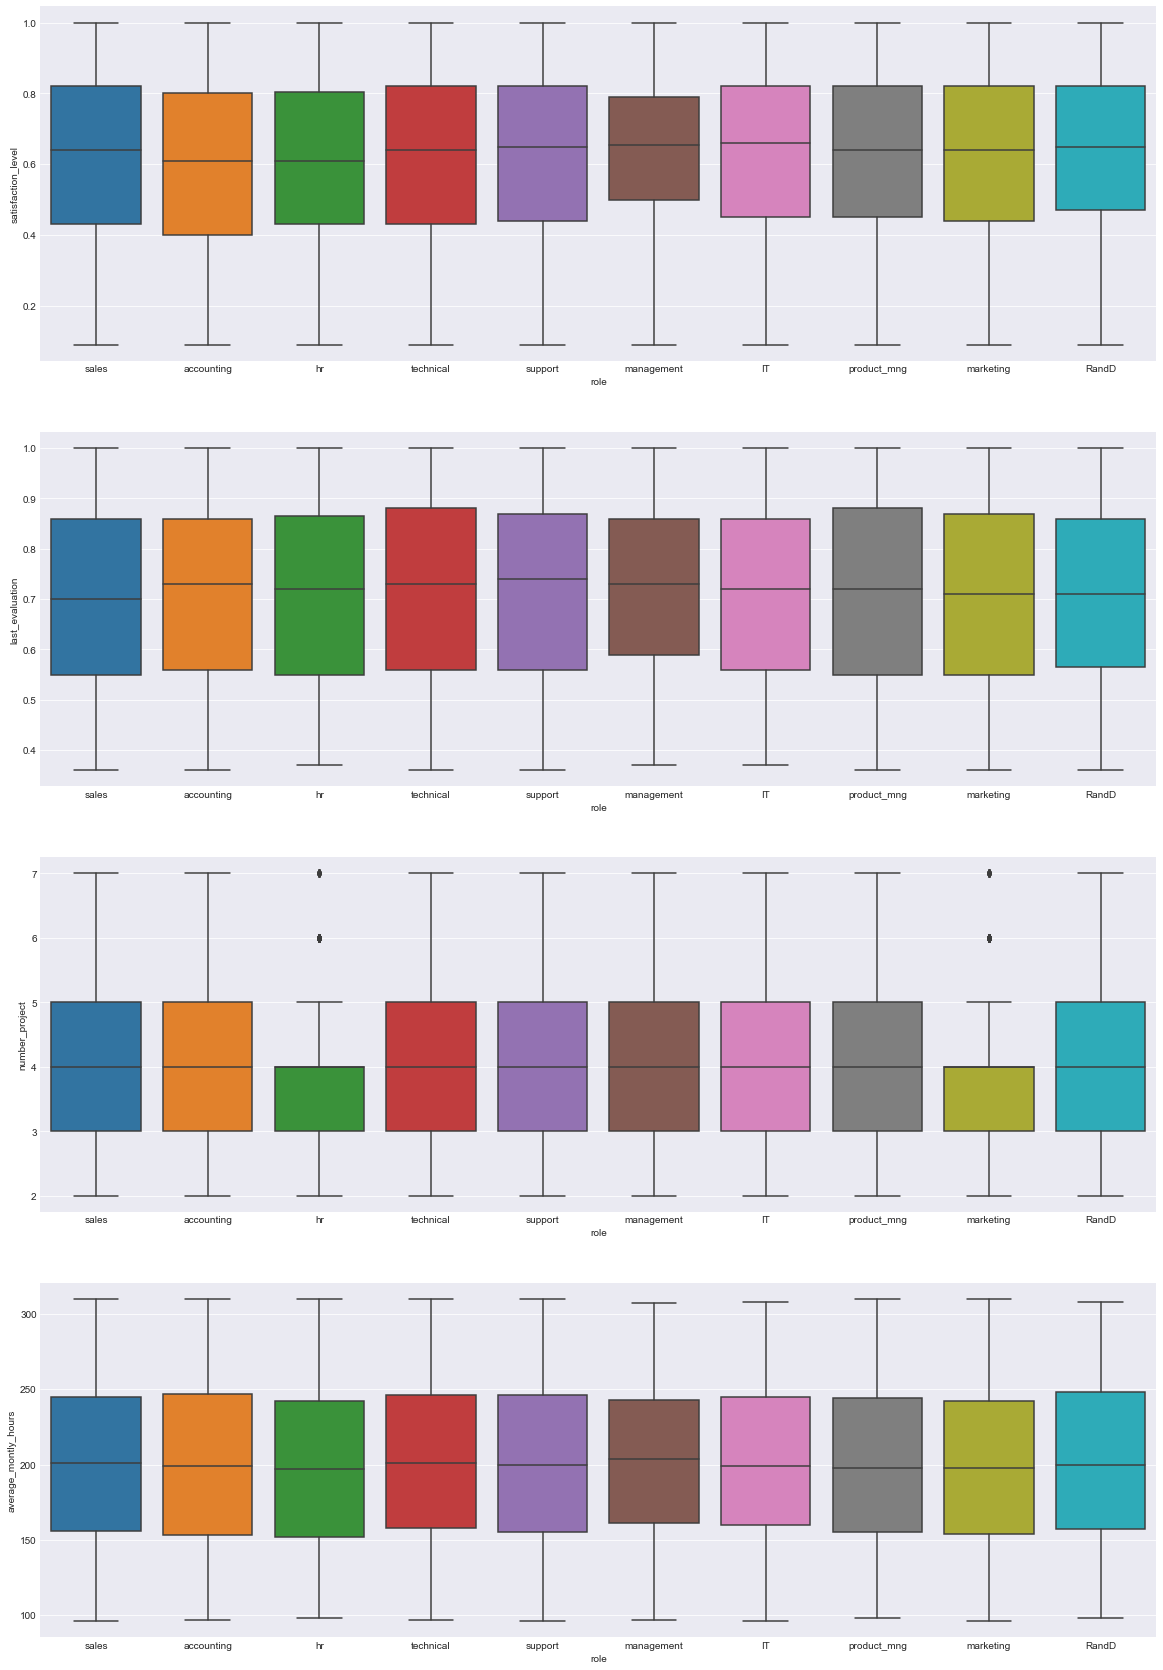

In [26]:
# Run the same evaluation as above for job role

f, ax = plt.subplots(figsize=(20,30))

plt.subplot(4,1,1)
sns.boxplot(x='role', y='satisfaction_level', data=df)

plt.subplot(4,1,2)
sns.boxplot(x='role', y='last_evaluation', data=df)

plt.subplot(4,1,3)
sns.boxplot(x='role', y='number_project', data=df)

plt.subplot(4,1,4)
sns.boxplot(x='role', y='average_montly_hours', data=df)

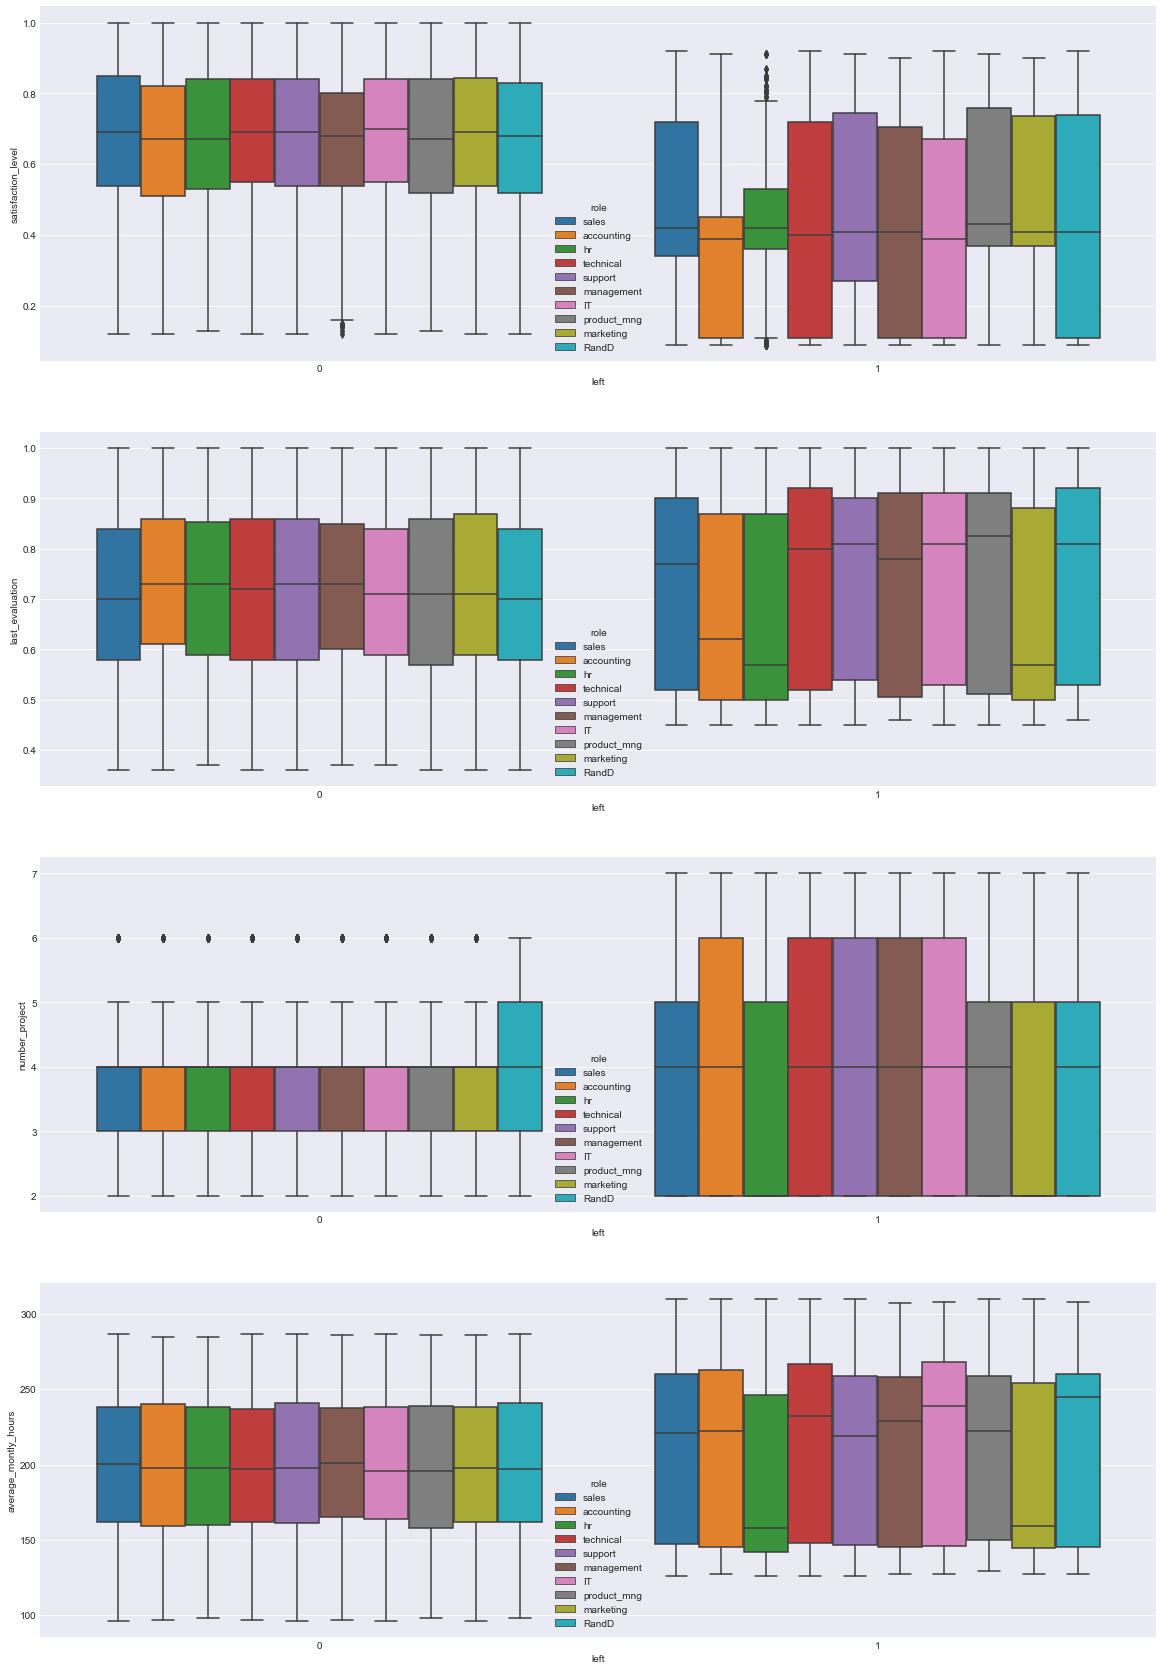

In [27]:
# Just for good measure, let's explore the relationships in light of the outcome variable

f, ax = plt.subplots(figsize=(20,30))

plt.subplot(4,1,1)
sns.boxplot(x='left', y='satisfaction_level', hue='role', data=df)

plt.subplot(4,1,2)
sns.boxplot(x='left', y='last_evaluation', hue='role', data=df)

plt.subplot(4,1,3)
sns.boxplot(x='left', y='number_project', hue='role', data=df)

plt.subplot(4,1,4)
sns.boxplot(x='left', y='average_montly_hours', hue='role', data=df)

In [28]:
# Create function to run Kruskal-Wallis test on a continuous variable grouped by role 

def kw_test(continuous_var_series):
    groups = []
    for role in df.role.unique():
        groups.append(np.array(continuous_var_series[df['role'] == role]))
    
    return stats.kruskal(groups[0],
                         groups[1],
                         groups[2],
                         groups[3],
                         groups[4],
                         groups[5],
                         groups[6],
                         groups[7],
                         groups[8],
                         groups[9]
                        )


# Create function to run 1-way ANOVA test on a continuous variable grouped by role 

def anova_test(continuous_var_series):
    groups = []
    for role in df.role.unique():
        groups.append(np.array(continuous_var_series[df['role'] == role]))
    
    return stats.f_oneway(groups[0],
                         groups[1],
                         groups[2],
                         groups[3],
                         groups[4],
                         groups[5],
                         groups[6],
                         groups[7],
                         groups[8],
                         groups[9]
                        )

In [29]:
print('Satisfaction Level')
print(kw_test(df.satisfaction_level))

print('\nLast Evaluation')
print(kw_test(df.last_evaluation))

print('\nNumber of Projects')
print(anova_test(df.number_project)) #Number of projects is normally distributed, so we run an ANOVA test

print('\nAverage Monthly Hours')
print(kw_test(df.average_montly_hours))

Satisfaction Level
KruskalResult(statistic=18.295704928564501, pvalue=0.031893764767489896)

Last Evaluation
KruskalResult(statistic=14.940111988942769, pvalue=0.092594187889203663)

Number of Projects
F_onewayResult(statistic=3.7044817508038155, pvalue=0.00011787808927553371)

Average Monthly Hours
KruskalResult(statistic=7.2478936115614712, pvalue=0.61132732289071956)


#### Notes:
1) Role that an employee has plays a somewhat significant impact on satisfaction levels, but a very low magnitude
2) When removing outliers, role that employee has has no impact on number of projects
3) None of the other 2 continuous variables are impacted by an employees role
4) When diving deeper into specific roles, some of them have an impact on average monthly hours

## Bivariate Data Exploration - Categorical Variables

<function matplotlib.pyplot.show>

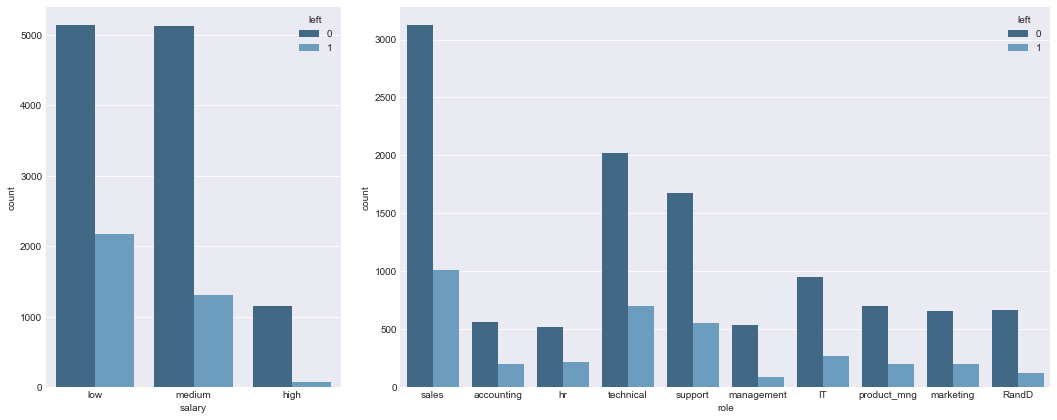

In [30]:
# Barplot to compare how the 2 categorical variables effect desired outcome variable

from matplotlib.gridspec import GridSpec
gs = GridSpec(1,3)
f, ax = plt.subplots(figsize=(18,7))

plt.subplot(gs[:,:1])
sns.countplot(x='salary', hue='left', data=df)

plt.subplot(gs[:,1:])
sns.countplot(x='role', hue='left', data=df)

plt.show

In [31]:
# Because the data has so many more data points for individuals who did not leave,
# the above plot unfortunately does not tell us much.

# Let's run a chi-square test on salary to determine whether there is a meaningful difference,
# and also break it out into the 2 groups we explored earlier

counttable_salary = pd.crosstab(df['salary'], df['left'])
counttable_salary_high = pd.crosstab(df_salary_high['salary'], df_salary_high['left'])
counttable_salary_low_medium = pd.crosstab(df_salary_low_medium['salary'], df_salary_low_medium['left'])

print ('Salary\n')
print ('The p-value for salary impact is {}'.format((stats.chisquare(counttable_salary, axis=None))[1]))
print ('The p-value for salary impact for those making a high salary is {}'.format((stats.chisquare(counttable_salary_high, axis=None))[1]))
print ('The p-value for salary impact for those making a low or medium salary is {}'.format((stats.chisquare(counttable_salary_low_medium, axis=None))[1]))

Salary

The p-value for salary impact is 0.0
The p-value for salary impact for those making a high salary is 2.0361103658821264e-204
The p-value for salary impact for those making a low or medium salary is 0.0


In [32]:
# Let's do the same for roles in the company

counttable_role = pd.crosstab(df['left'], df['role'])

print ('Role\n')
print ('The p-value for whether role has an impact is {}'.format((stats.chisquare(counttable_role, axis=None))[1]))

Role

The p-value for whether role has an impact is 0.0


In [33]:
# Checking if specific roles hold more weight than others

for role in df.role.unique():
    df_role = df[df['role'] == role]
    counttable = pd.crosstab(df['left'], df['role'])
    print ('P-value for {} is {}'.format(role,(stats.chisquare(counttable, axis=None))[1]))

P-value for sales is 0.0
P-value for accounting is 0.0
P-value for hr is 0.0
P-value for technical is 0.0
P-value for support is 0.0
P-value for management is 0.0
P-value for IT is 0.0
P-value for product_mng is 0.0
P-value for marketing is 0.0
P-value for RandD is 0.0


Text(0.5,1,'Low or Medium Salary Levels')

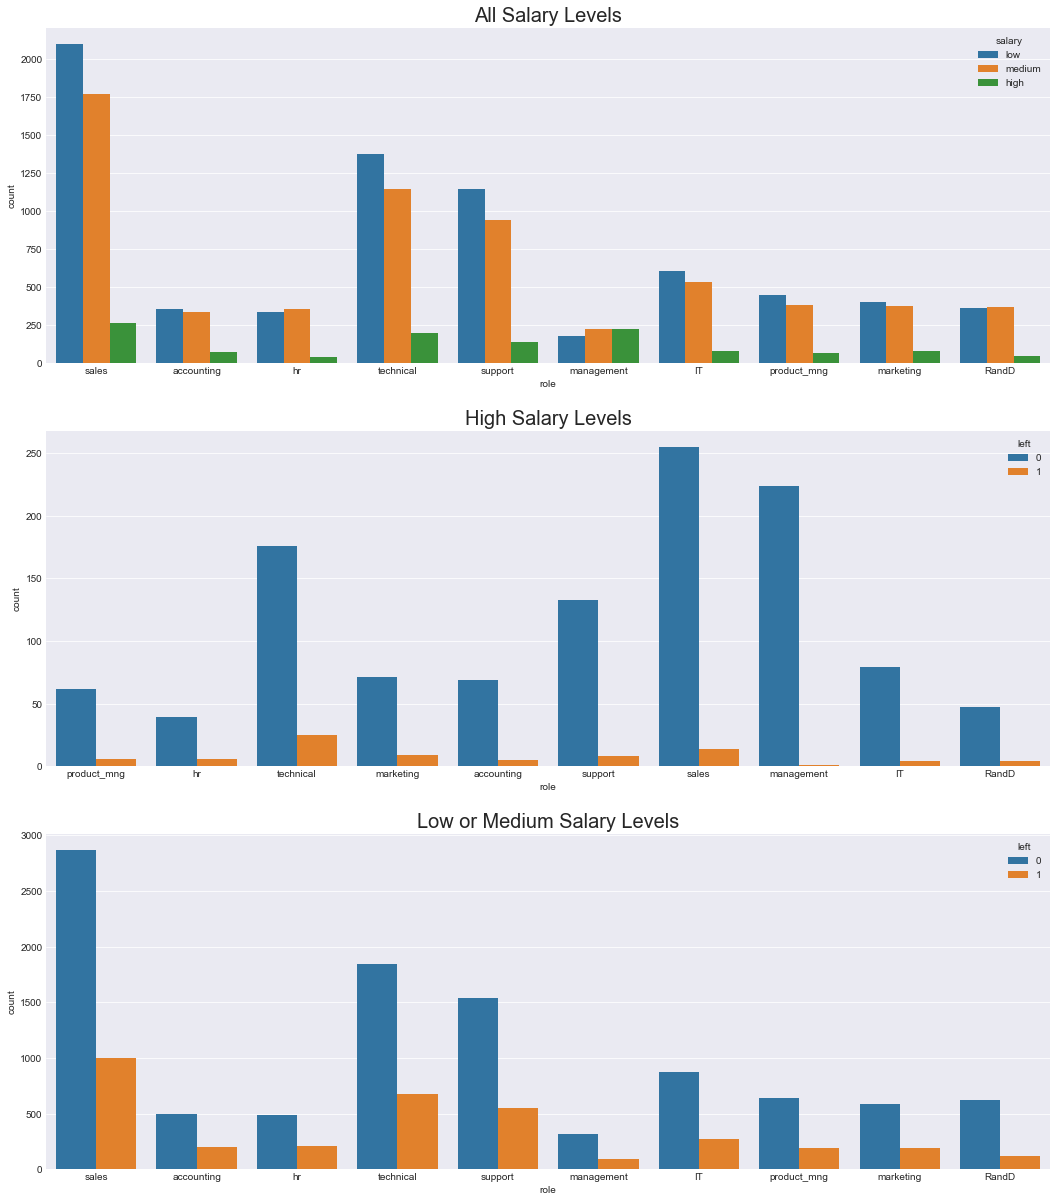

In [34]:
# Finally, let's see if the 2 correlate together as well

f, ax = plt.subplots(figsize=(18,21))

plt.subplot(311)
sns.countplot(x='role', hue='salary', data=df)
plt.title('All Salary Levels', fontdict={'fontsize':20})

plt.subplot(312)
sns.countplot(x='role', hue='left', data=df_salary_high)
plt.title('High Salary Levels', fontdict={'fontsize':20})

plt.subplot(313)
sns.countplot(x='role', hue='left', data=df_salary_low_medium)
plt.title('Low or Medium Salary Levels', fontdict={'fontsize':20})

#### Notes:

1) It's clear that all categorical variables have an impact on each other

## Feature Engineering

In [35]:
# Creating data frame to hold our features

features = pd.DataFrame(df.salary)


# Coding salary as a binary, ordinal variable because there is a distinct difference 
# in outcomes between high and low/medium salaries

features['salary'] = np.where((df['salary']=='high'), 1, 0)
features

,salary
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [36]:
# Combining 2 highly correlated continuous variables

means = df[['average_montly_hours','number_project']].mean(axis=0)
stds = df[['average_montly_hours','number_project']].std(axis=0)
features['combining_correlated_vars'] = ((df[['average_montly_hours','number_project']] - means) / stds).mean(axis=1)

In [37]:
# Testing how well new combined variable correlates with previous variables

test_corrmatt = df.iloc[:,2:4]
test_corrmatt['feature'] = features['combining_correlated_vars']
print(test_corrmatt.corr())

                      number_project  average_montly_hours   feature
number_project              1.000000              0.417211  0.841787
average_montly_hours        0.417211              1.000000  0.841787
feature                     0.841787              0.841787  1.000000


In [38]:
# Multiplying interacting vars together

features['salary_last_evaluation'] = features['salary'] * df['last_evaluation']
features['salary_number_project'] = features['salary'] * df['number_project']
features['salary_monthly_hours'] = features['salary'] * df['average_montly_hours']
features.head(20)

,salary,combining_correlated_vars,salary_last_evaluation,salary_number_project,salary_monthly_hours
0,0,-1.172412,0.0,0,0
1,0,1.095731,0.0,0,0
2,0,2.007143,0.0,0,0
3,0,0.705287,0.0,0,0
4,0,-1.152390,0.0,0,0
5,0,-1.212458,0.0,0,0
6,0,1.351210,0.0,0,0
7,0,1.065697,0.0,0,0
8,0,0.715298,0.0,0,0
9,0,-1.322583,0.0,0,0


In [39]:
# Running PCA on continuous variables - condensing 4 variables into 2 features

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(df_continuous_standard)

print('Selected PC components explain {:.2f}% of variance'.format((sklearn_pca.explained_variance_ratio_[0] + sklearn_pca.explained_variance_ratio_[1])))

Selected PC components explain 0.70% of variance


In [40]:
# Adding PCs to features set

PCA_features = pd.DataFrame(Y_sklearn, columns=[['PC1','PC2']])
features = pd.concat([features, PCA_features], axis=1)

In [41]:
features.head()

,salary,combining_correlated_vars,salary_last_evaluation,salary_number_project,salary_monthly_hours,PC1,PC2
0,0,-1.172412,0.0,0,0,-1.932054,0.901342
1,0,1.095731,0.0,0,0,1.712917,-0.762197
2,0,2.007143,0.0,0,0,3.013785,2.107468
3,0,0.705287,0.0,0,0,1.303532,-0.479232
4,0,-1.152390,0.0,0,0,-1.938107,0.956999
